In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
plt.rc('font', size=14)
import seaborn as sns
sns.set(style='whitegrid', color_codes=True, rc={'figure.figsize':(11,8)}, font_scale=2)
import sklearn as sk

In [81]:
df = pd.read_csv("https://gitlab.com/mirsakhawathossain/pha-ml/-/raw/master/Dataset/dataset.csv")
df["pha"] = df["pha"] == "Y"
df["neo"] = df["neo"] == "Y"

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958524 non-null  bool   
 7   pha             958524 non-null  bool   
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [73]:
df

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,False,False,3.400,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,False,False,4.200,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,False,False,5.330,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,False,False,3.000,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,False,False,6.900,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,bPLS6013,3246801,(6013 P-L),6013 P-L,NaN,NaN,False,False,17.135,NaN,...,6.969000e+00,7.433000e+00,4.631100e+01,2.738300e+01,1.041200e+00,1.652100e-01,1.309700e+02,7.264900e+02,MBA,0.23839
958520,bPLS6331,3246834,(6331 P-L),6331 P-L,NaN,NaN,False,False,18.500,NaN,...,1.563500e-05,5.598600e-05,2.380400e-04,1.298200e-04,2.418900e-08,3.346100e-09,4.690200e-04,1.578500e-05,MBA,0.53633
958521,bPLS6344,3013075,(6344 P-L),6344 P-L,NaN,NaN,True,True,20.400,NaN,...,1.853300e-05,5.691700e-05,8.969200e-05,5.272600e-05,1.650100e-07,1.101600e-08,2.830600e-04,9.127500e-05,APO,0.51556
958522,bT2S2060,3246457,(2060 T-2),2060 T-2,NaN,NaN,False,False,18.071,NaN,...,5.448800e-01,4.391600e+00,1.898800e+01,1.083800e+01,7.171600e-01,1.016700e-01,3.898400e+01,5.035500e+02,MBA,0.25641


In [80]:
df[df["diameter"].isna()]["albedo"]

681      NaN
698      NaN
718      NaN
729      NaN
842      NaN
          ..
958519   NaN
958520   NaN
958521   NaN
958522   NaN
958523   NaN
Name: albedo, Length: 822315, dtype: float64

SPK-ID: Object primary SPK-ID  
Object ID: Object internal database ID  
Object fullname: Object full name/designation  
pdes: Object primary designation  
name: Object IAU name  
NEO: Near-Earth Object (NEO) flag  
PHA: Potentially Hazardous Asteroid (PHA) flag  
H: Absolute magnitude parameter  
Diameter: object diameter (from equivalent sphere) km Unit  
Albedo: Geometric albedo  
Diameter_sigma: 1-sigma uncertainty in object diameter km Unit  
Orbit_id: Orbit solution ID  
Epoch: Epoch of osculation in modified Julian day form  
Equinox: Equinox of reference frame  
e: Eccentricity  
a: Semi-major axis au Unit  
q: perihelion distance au Unit  
i: inclination; angle with respect to x-y ecliptic plane  
tp: Time of perihelion passage TDB Unit  
moid_ld: Earth Minimum Orbit Intersection Distance au Unit  

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='diameter', ylabel='albedo'>

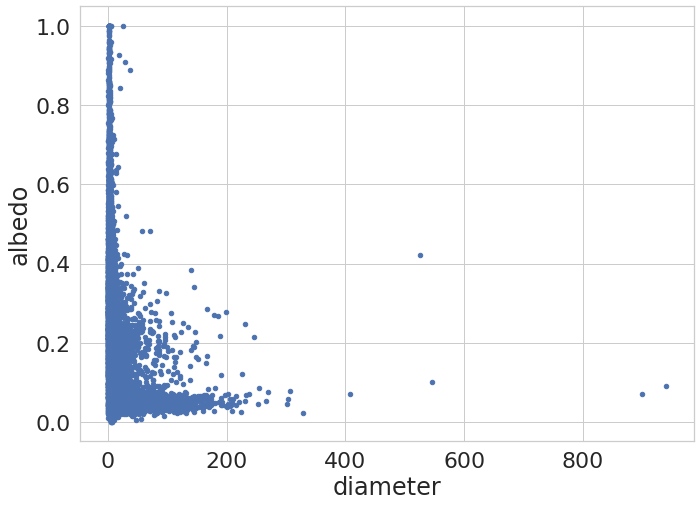

In [7]:
df.plot.scatter("diameter", "H")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='diameter', ylabel='H'>

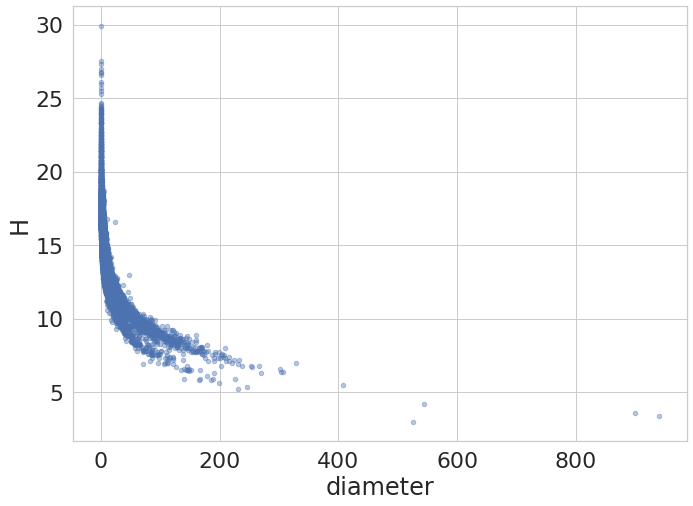

In [61]:
df.plot.scatter("diameter", "H",alpha=.4)

<AxesSubplot:xlabel='diameter', ylabel='albedo'>

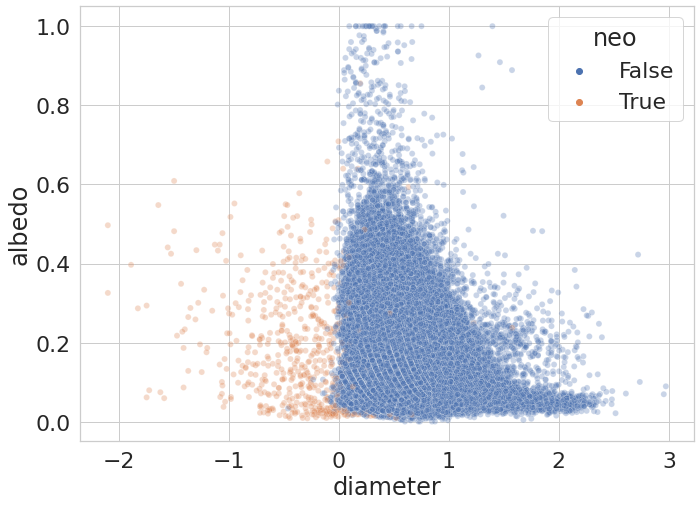

In [70]:
sns.scatterplot(np.log10(df["diameter"]), df["albedo"], hue=df["neo"], alpha=.3)

KeyError: 'neo'

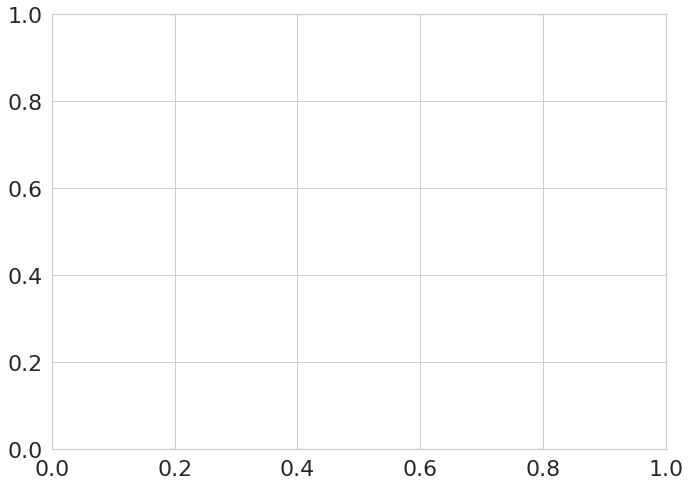

In [59]:
df.plot.scatter("diameter", "neo")

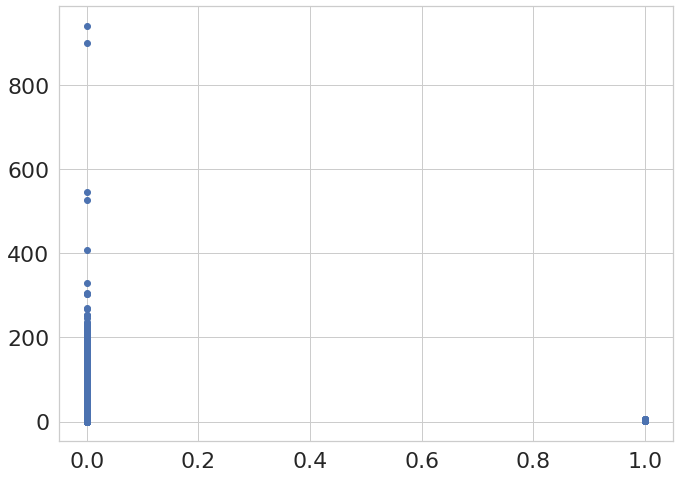

In [27]:
plt.scatter(df["pha"], df["diameter"])

In [57]:
df.groupby(["neo","pha"])["pha"].count()

neo    pha  
False  False    935629
True   False     20829
       True       2066
Name: pha, dtype: int64

In [43]:
df["pha"].value_counts()

False    956458
True       2066
Name: pha, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaler.transform(df)